In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils.visualization_tb as vi
import utils.mining_data_tb as mn
import utils.folders_tb as fo

In [2]:
vi.sns_gstyle()
%matplotlib inline

In [3]:
#Agrego asigno el dataset a una variable.
data_math = vi.read_my_csv("..\data\student-mat.csv")
data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
#Asigno un segundo dataset a otra variable.
data_port = vi.read_my_csv("..\data\student-por.csv")
data_port

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
#Como las columnas son coincidentes, juntamos las filas de ambos dataframes para formar una única fuente de datos.
data = data_math.append(data_port)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
vi.alcohol_columns_intro()

-school: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
-sex: Student's sex (binary: 'F' - female or 'M' - male)
-age: Student's age (numeric: from 15 to 22)
-address: Student's home address type (binary: 'U' - urban or 'R' - rural)
-famsize: Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
-Pstatus: Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
-Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
-Fedu: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
-Mjob: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
-Fjob: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police),

In [8]:
#Buscamos duplicados.
mn.dulicate_in_dataframe(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [9]:
#Ahora que he reunido los datos, me interesa editar la tabla para mostrar los valores que deseo. Empiezo sumando las distintas ingestas de alcohol clasificadas por temporalidad.
mn.conc_columns(data=data, name_column="Alc", list_column=["Dalc","Walc"])
data = data.drop(columns=["Dalc","Walc"])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,Alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,3,10,7,8,10,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,5,4,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,5,4,10,11,10,3
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,4,15,15,16,2
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,5,6,11,12,9,2
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,2,6,10,10,10,7


In [10]:
#Lo mismo hago con las notas, junto la nota de los 3 grados.
mn.conc_columns(data=data, name_column="Grade", list_column=["G1","G2","G3"])
data = data.drop(columns=["G1","G2","G3"])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Alc,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,2,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,2,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,5,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,2,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,5,4,3,31
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,4,2,46
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,5,6,2,32
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,6,7,30


In [11]:
#Quito las columnas que no creo que necesite para el proyecto
data = data.drop(columns=["school", "Mjob", "Fjob", "health"])
data.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'absences', 'Alc', 'Grade'],
      dtype='object')

In [12]:
#Buscamos NaN values en el dataframe.
mn.null_in_dataframe(data)


El dataframe no contiene valores nulos.


In [13]:
#Como puedo observar muchas de las columnas tienen tipologia objeto para sus valores. Analizo los valores de cada columna.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   reason      1044 non-null   object
 8   guardian    1044 non-null   object
 9   traveltime  1044 non-null   int64 
 10  studytime   1044 non-null   int64 
 11  failures    1044 non-null   int64 
 12  schoolsup   1044 non-null   object
 13  famsup      1044 non-null   object
 14  paid        1044 non-null   object
 15  activities  1044 non-null   object
 16  nursery     1044 non-null   object
 17  higher      1044 non-null   object
 18  internet    1044 non-null   object
 19  romantic    1044 non-null   object
 20  famrel   

In [14]:
mn.check_columns_unique(data)

La columna sex tiene estos valores únicos: ['F' 'M']
La columna age tiene estos valores únicos: [18 17 15 16 19 22 20 21]
La columna address tiene estos valores únicos: ['U' 'R']
La columna famsize tiene estos valores únicos: ['GT3' 'LE3']
La columna Pstatus tiene estos valores únicos: ['A' 'T']
La columna Medu tiene estos valores únicos: [4 1 3 2 0]
La columna Fedu tiene estos valores únicos: [4 1 2 3 0]
La columna reason tiene estos valores únicos: ['course' 'other' 'home' 'reputation']
La columna guardian tiene estos valores únicos: ['mother' 'father' 'other']
La columna traveltime tiene estos valores únicos: [2 1 3 4]
La columna studytime tiene estos valores únicos: [2 3 1 4]
La columna failures tiene estos valores únicos: [0 3 2 1]
La columna schoolsup tiene estos valores únicos: ['yes' 'no']
La columna famsup tiene estos valores únicos: ['no' 'yes']
La columna paid tiene estos valores únicos: ['no' 'yes']
La columna activities tiene estos valores únicos: ['no' 'yes']
La columna n

In [15]:
#Busco valores anómalos. En principio todos son correctos, no hay valores que salgan de los límites establecidos.
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,absences,Alc,Grade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,4.434866,3.778736,33.801724
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,6.210017,1.988434,9.656416
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,4.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,2.000000,28.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,2.000000,3.000000,34.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,6.000000,5.000000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,10.000000,58.000000


In [16]:
#Dejo los outliers fuera.
mn.outlier_clean(data)

(649, 26)
c:\Users\Adrià\Desktop\Thebridge\adria_gallardo_thebridge_ds\Proyectos\EDA\src\utils\mining_data_tb.py:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < limite_inferior) | (data > limite_superior)).any(axis=1)]
c:\Users\Adrià\Desktop\Thebridge\adria_gallardo_thebridge_ds\Proyectos\EDA\src\utils\mining_data_tb.py:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < limite_inferior) | (data > limite_superior)).any(axis=1)]


,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,freetime,goout,absences,Alc,Grade
0,F,18,U,GT3,A,4,4,course,mother,2,...,yes,yes,no,no,4,3,4,6,2,17
1,F,17,U,GT3,T,1,1,course,father,1,...,no,yes,yes,no,5,3,3,4,2,16
2,F,15,U,LE3,T,1,1,other,mother,1,...,yes,yes,yes,no,4,3,2,10,5,25
3,F,15,U,GT3,T,4,2,home,mother,1,...,yes,yes,yes,yes,3,2,2,2,2,44
4,F,16,U,GT3,T,3,3,home,father,1,...,yes,yes,no,no,4,3,2,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,course,mother,1,...,no,yes,yes,no,5,4,2,4,3,31
645,F,18,U,LE3,T,3,1,course,mother,1,...,yes,yes,yes,no,4,3,4,4,2,46
646,F,18,U,GT3,T,1,1,course,mother,2,...,yes,yes,no,no,1,1,1,6,2,32
647,M,17,U,LE3,T,3,1,course,mother,2,...,no,yes,yes,no,2,4,5,6,7,30


In [17]:
#Creo una tabla para trabajar con valores binarios como "integers", la paso a llamar data_b y queda guardada como variable.
data_b = data.copy()
mn.bin_obj_to_int(data=data_b)
data_b

,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,freetime,goout,absences,Alc,Grade
0,0,18,0,0,0,4,4,course,mother,2,...,0,0,0,0,4,3,4,6,2,17
1,0,17,0,0,1,1,1,course,father,1,...,1,0,1,0,5,3,3,4,2,16
2,0,15,0,1,1,1,1,other,mother,1,...,0,0,1,0,4,3,2,10,5,25
3,0,15,0,0,1,4,2,home,mother,1,...,0,0,1,1,3,2,2,2,2,44
4,0,16,0,0,1,3,3,home,father,1,...,0,0,0,0,4,3,2,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,0,1,2,3,course,mother,1,...,1,0,1,0,5,4,2,4,3,31
645,0,18,0,1,1,3,1,course,mother,1,...,0,0,1,0,4,3,4,4,2,46
646,0,18,0,0,1,1,1,course,mother,2,...,0,0,0,0,1,1,1,6,2,32
647,1,17,0,1,1,3,1,course,mother,2,...,1,0,1,0,2,4,5,6,7,30


In [18]:
#Analizo las correlaciones entre la ingesta de alcohol y las demás. Utilizo data_b para trabajar también con los valores binarios.
correlation_alc = data_b.corr()['Alc'].sort_values()
correlation_alc

studytime    -0.221255
Grade        -0.152236
famrel       -0.100126
famsup       -0.057778
Medu         -0.018261
activities   -0.000798
romantic      0.010159
Fedu          0.012543
Pstatus       0.037981
internet      0.046304
paid          0.046889
address       0.057402
schoolsup     0.072293
nursery       0.091831
famsize       0.092863
traveltime    0.104649
higher        0.108197
failures      0.122773
age           0.124714
freetime      0.150736
absences      0.151209
sex           0.322097
goout         0.374447
Alc           1.000000
Name: Alc, dtype: float64

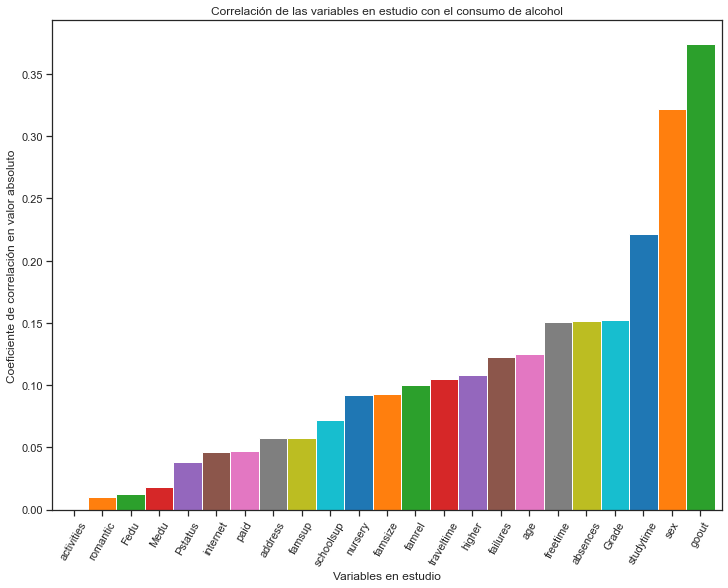

In [19]:
vi.corr_onevalue_graphic(data=correlation_alc, variable = "el consumo de alcohol")

In [20]:
correlation_grade = data_b.corr()['Grade'].sort_values()
correlation_grade

failures     -0.397262
higher       -0.263819
Alc          -0.152236
age          -0.129135
traveltime   -0.126157
address      -0.125527
goout        -0.107309
romantic     -0.089872
absences     -0.077224
freetime     -0.065489
nursery      -0.048750
paid         -0.036837
sex          -0.028871
Pstatus      -0.015809
famsup       -0.000429
famrel        0.047518
activities    0.053655
famsize       0.061847
schoolsup     0.104117
internet      0.116900
Fedu          0.186610
studytime     0.192288
Medu          0.226919
Grade         1.000000
Name: Grade, dtype: float64

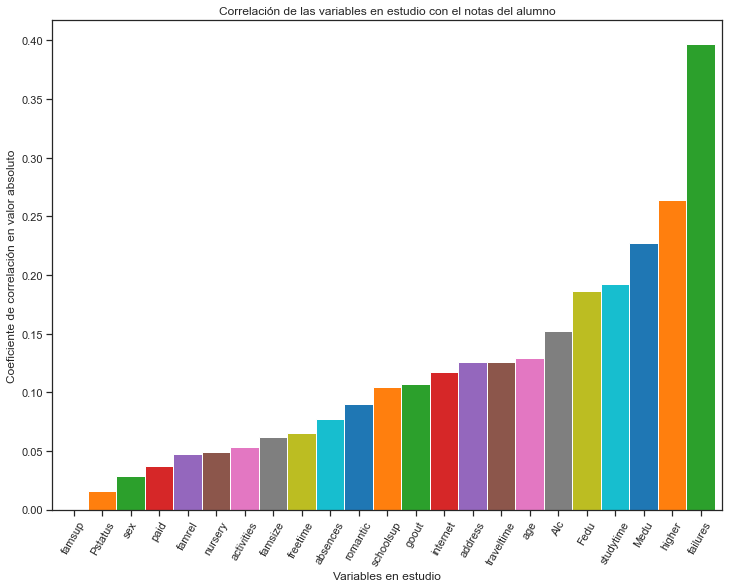

In [21]:
vi.corr_onevalue_graphic(data=correlation_grade, variable = "las notas del alumno")

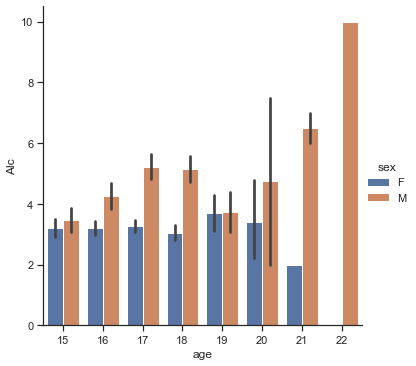

In [50]:
sns.catplot(data=data, x="age", y="Alc", kind="bar", hue="sex")

In [53]:
plt.figure(figsize=(10,8))
c = data.corr()
sns.heatmap(c, cmap="", annot=True)

ValueError: 'reds' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'